In [ ]:
Boston Housing Analysis

#Task 1: Familiarize Yourself with the Dataset

In [29]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [30]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [31]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [32]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [33]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [34]:
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [35]:
print(boston_df.isnull().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


#Task 2: Generate Descriptive Statistics and Visualizations

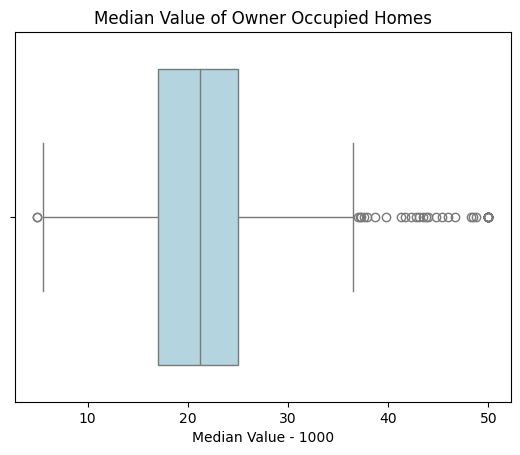

In [36]:
#Provide a Boxplot for the median Value of owner-occupied homes.

sns.boxplot(x=boston_df['MEDV'], color="lightblue")
pyplot.title('Median Value of Owner Occupied Homes')
pyplot.xlabel('Median Value - 1000')
pyplot.show()

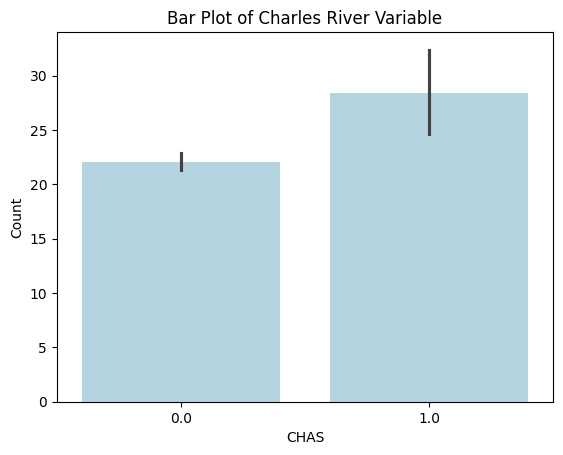

In [37]:
#Provide a Barplot for the Charles River variable.

sns.barplot(x="CHAS", y="MEDV",data=boston_df, color="lightblue")
pyplot.title('Bar Plot of Charles River Variable')
pyplot.ylabel('Count')
pyplot.show()

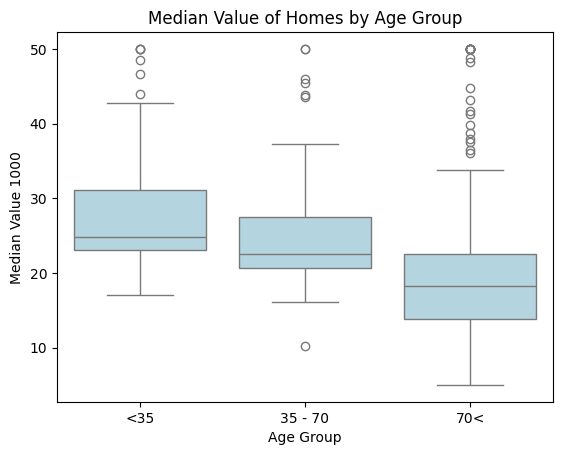

In [38]:
#Provide a boxplotfor the MEDV variable vs the AGE variable. Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['<35', '35 - 70', '70<'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, color="lightblue")
pyplot.title('Median Value of Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value 1000')
pyplot.show()

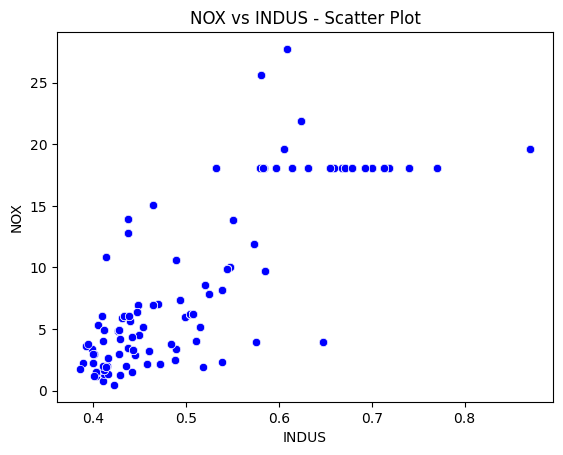

In [39]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='blue')
pyplot.title('NOX vs INDUS - Scatter Plot')
pyplot.xlabel('INDUS')
pyplot.ylabel('NOX')
pyplot.show()

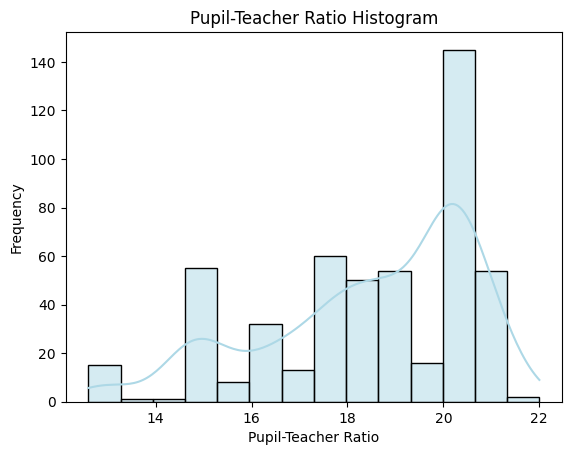

In [40]:
#Provide a histogram for the pupil to teacher ratio variable.

sns.histplot(boston_df['PTRATIO'], kde=True, color='lightblue')
pyplot.title('Pupil-Teacher Ratio Histogram')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [ ]:
#Task 3: Use the appropriate tests

In [54]:
from scipy import stats
a = boston_df[boston_df['CHAS'] == 1]['MEDV']
b = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(river_data, not_river_data)
print("T-Stat",t_stat)
print("P-Value",p_value)

T-Stat 3.996437466090509
P-Value 7.390623170519905e-05


In [ ]:
#T-Stat & P-Value - (P-Value is less than 0.05)

In [44]:
model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df         F   PR(>F)
C(AGE)    29884.038419  355.0  0.984009  0.55397
Residual  12832.256996  150.0       NaN      NaN


In [ ]:
#Anova Results - Testing the differences in MEDV based on Age.

In [21]:
y = boston_df['MEDV']
x = boston_df['DIS']

In [22]:
x = sm.add_constant(x)

In [23]:
results = sm.OLS(y,x).fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        20:55:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
#Conclusion - Weighted distance has a significant impact on median home values.